# Day 42

## Predicting the Baltimore Salary

1. Importing the Libraries
2. Importing the Datasets
3. Data cleaning, Data Exploration, Data Manuplation, Data Visualization.
4. EDA - Exploratory Data Analysis
5. Spliting the Datasets
6. Choosing the model
7. Training the Model
8. Testing the Model
9. Model Evaluation
10. [Optional] Exporting the dataset into the .csv format.

## Importing the Librabies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.svm import SVR

import warnings
warnings.filterwarnings("ignore")

## Problem Statement
Given the dataset which captures the salary from July 1st, 2013 through June 30th, 2014.\
It includes only those employees who are employed on June 30,2014.\
Predict the Salary of the Employees working in Baltimore.

## Importing the Datasets
Links: https://raw.githubusercontent.com/Lochana24/Baltimore-Salary-Prediction/main/train.csv

In [592]:
df = pd.read_csv("https://raw.githubusercontent.com/Lochana24/Baltimore-Salary-Prediction/main/train.csv")

In [593]:
df.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00,$873.63
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00,$52868.38
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00,$67439.19
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00,$58654.74
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00,$39686.95


In [594]:
# Some Data Explorations
df.tail()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
18976,"Zotamou,Jean Marie D",AIDE BLUE CHIP,W02235,Youth Summer,05/21/2014,$11310.00,NaN
18977,"Zotamou,Pivot D",AIDE BLUE CHIP,W02629,Youth Summer,05/21/2014,$11310.00,NaN
18978,"Zovistoski,Zachary D",POLICE OFFICER TRAINEE,A99416,Police Department,12/17/2013,$43999.00,$21070.03
18979,"Zubyk,Stanislav T",POLICE OFFICER,A99262,Police Department,01/23/2013,$44104.00,$48608.12
18980,"Zukowski,Charles J",Waste Water Tech Supv I Pump,A50206,DPW-Water & Waste Water,10/15/1979,$53568.00,$52164.32


In [595]:
df.shape

(18981, 7)

In [596]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18981 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0    Name         18981 non-null  object
 1   JobTitle      18981 non-null  object
 2   AgencyID      18981 non-null  object
 3   Agency        18981 non-null  object
 4   HireDate      18911 non-null  object
 5   AnnualSalary  18981 non-null  object
 6   GrossPay      15758 non-null  object
dtypes: object(7)
memory usage: 1.0+ MB


In [597]:
df.describe()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
count,18981,18981,18981,18981,18911,18981,15758
unique,18788,1075,1177,65,4737,1590,13732
top,"Battle,Daron J",AIDE BLUE CHIP,P04001,Youth Summer,05/21/2014,$11310.00,$1051.25
freq,2,4817,316,4323,1478,4811,848


In [598]:
df.columns

Index([' Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')

In [599]:
# Removing the leading and trailing spaces and converting all the columns into the lower case.

# 1. Way
# df.rename(columns={' Name':'name', 'JobTitle' : 'jobtitle', 'AgencyID' : "agencyID", 'Agency':"Agency", 'HireDate': 'hiredate',
#                    'AnnualSalary':'annualsalary','GrossPay':'grosspay'},inplace=True)

# 2.Way
df.columns = df.columns.str.strip().str.lower()

In [600]:
df.columns

Index(['name', 'jobtitle', 'agencyid', 'agency', 'hiredate', 'annualsalary',
       'grosspay'],
      dtype='object')

In [601]:
# Check the null values
df.isna().sum()

name               0
jobtitle           0
agencyid           0
agency             0
hiredate          70
annualsalary       0
grosspay        3223
dtype: int64

In [602]:
# Delete the column grosspay
df.drop(columns='grosspay', axis=1, inplace=True)

In [603]:
df.agencyid

0        W02200
1        A03031
2        A29005
3        A65026
4        A99416
          ...  
18976    W02235
18977    W02629
18978    A99416
18979    A99262
18980    A50206
Name: agencyid, Length: 18981, dtype: object

In [604]:
df.agencyid.value_counts()

P04001    316
C90786    276
W02629    193
P04002    191
A99416    166
         ... 
W02539      1
A65052      1
W02106      1
W02590      1
W02339      1
Name: agencyid, Length: 1177, dtype: int64

In [605]:
df.agencyid.value_counts().map(df.agency)

P04001    HLTH-Health Department 
C90786             Youth Summer  
W02629         Police Department 
P04002           DPW-Solid Waste 
A99416             Youth Summer  
                   ...           
W02539        OED-Employment Dev 
A65052        OED-Employment Dev 
W02106        OED-Employment Dev 
W02590        OED-Employment Dev 
W02339        OED-Employment Dev 
Name: agencyid, Length: 1177, dtype: object

In [606]:
df[df.agencyid == "W02106"]['agency']

8559    Youth Summer  
Name: agency, dtype: object

In [607]:
df.jobtitle.value_counts()

AIDE BLUE CHIP                    4817
POLICE OFFICER                    1866
LABORER (Hourly)                   597
EMT Firefighter Suppression        358
CROSSING GUARD                     337
                                  ... 
VEHICLE DAMAGE INVESTIGATOR          1
Community Health Nurse I             1
ACCOUNTING SYSTEMS ANALYST           1
DESK TOP PUBLISHING COORDINATO       1
Research Analyst II                  1
Name: jobtitle, Length: 1075, dtype: int64

In [608]:
df.annualsalary.value_counts()

$11310.00     4811
$20800.00      325
$29245.00      196
$43999.00      169
$44773.00      163
              ... 
$116300.00       1
$83500.00        1
$40994.00        1
$42846.00        1
$900.00          1
Name: annualsalary, Length: 1590, dtype: int64

In [609]:
# Remove the $ from the annualsalary column and change the dtype to integer
df.annualsalary = df.annualsalary.str.strip('$').astype(float)

In [610]:
df.head()

,name,jobtitle,agencyid,agency,hiredate,annualsalary
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,11310.0
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,53428.0
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,68300.0
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,62000.0
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,43999.0


In [611]:
# seperate the hiredate column into 3 part i.e hireday, hiremonth, hieryear and the data type should be int.

# extract day, month and year from the HireDate column using re.split
df[['hiremonth', 'hireday','hireyear']] = df.hiredate.str.split("/", expand=True).astype(float)

# fill the NaN values with the mean of the column
df['hireday'].fillna(df['hireday'].mean(), inplace=True)
df['hiremonth'].fillna(df['hiremonth'].mean(), inplace=True)
df['hireyear'].fillna(df['hireyear'].mean(), inplace=True)

# convert the filled columns to int again
df['hireday'] = df['hireday'].astype(int)
df['hiremonth'] = df['hiremonth'].astype(int)
df['hireyear'] = df['hireyear'].astype(int)

# # change the index values of the HireDay, HireMonth, and HireYear columns
# df = df.reindex(columns=['hiremonth', 'hireday','hireyear'])
columns = df.columns.tolist()
columns.remove('annualsalary')
columns.append('annualsalary')
df = df.reindex(columns=columns)

# drop the original HireDate column
df.drop(columns=['hiredate'], inplace=True)


In [612]:
df.head()

,name,jobtitle,agencyid,agency,hiremonth,hireday,hireyear,annualsalary
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,6,10,2013,11310.0
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10,24,1979,53428.0
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,9,25,2006,68300.0
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,7,23,2009,62000.0
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,7,24,2013,43999.0


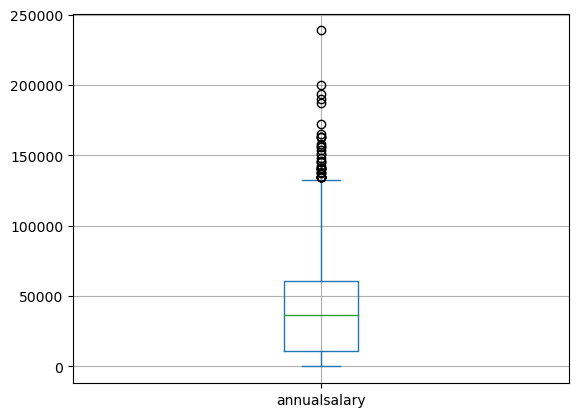

In [613]:
# Plot a Boxplot for the annualsalary()

df.annualsalary.plot.box();
plt.grid()

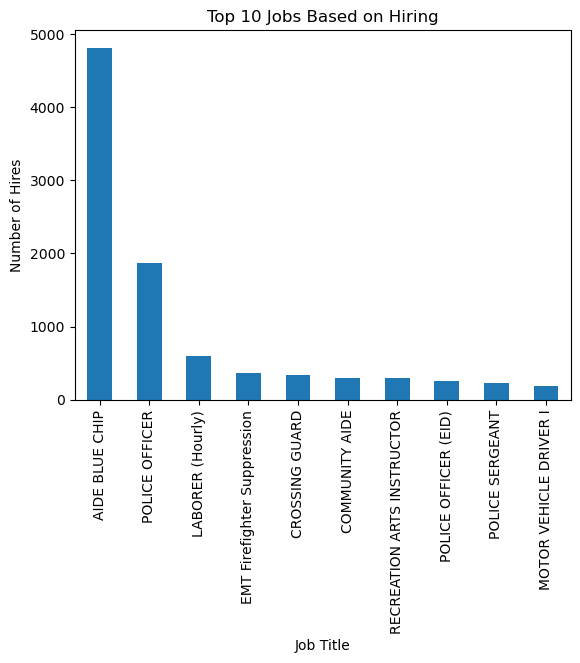

In [614]:
#  Plot top 10 Jobs based on the hiring

df.groupby(['jobtitle'])['name'].count().sort_values(ascending=False).head(10).plot.bar()

plt.xlabel('Job Title')
plt.ylabel('Number of Hires')
plt.title('Top 10 Jobs Based on Hiring')
plt.xticks(rotation=90)
plt.show()

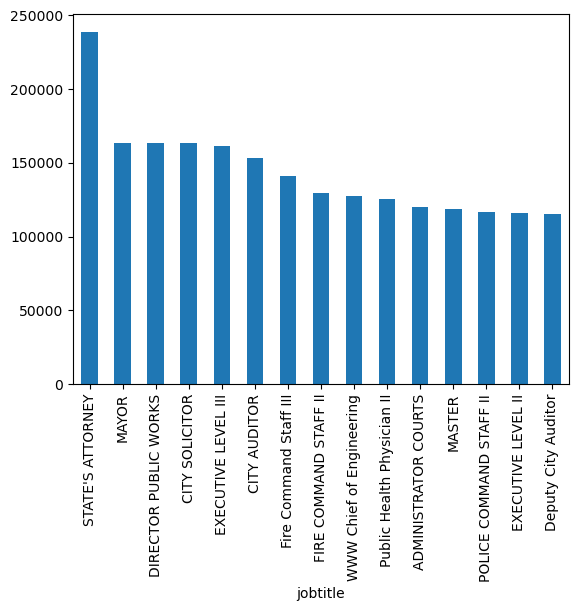

In [615]:
# Plot a top 15 jobs with the highest salary
df.groupby(['jobtitle'])['annualsalary'].mean().sort_values(ascending=False).head(15).plot.bar();



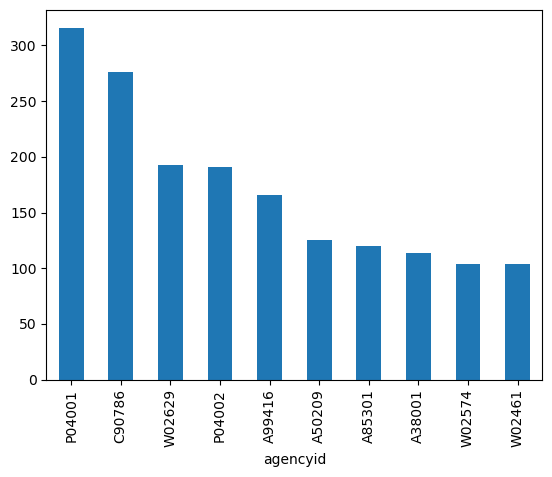

In [616]:
# Plot top 10 Agency's ID that hase the highest number of Employess
df.groupby(['agencyid'])['name'].count().sort_values(ascending=False).head(10).plot.bar();

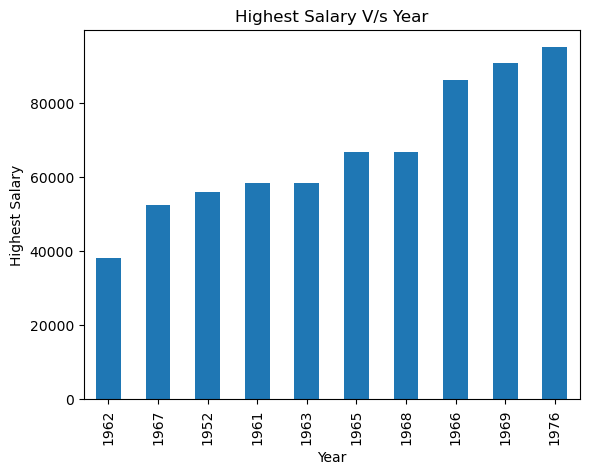

In [617]:
# Plot the Highest Salary V/s Year graph
df.groupby('hireyear')['annualsalary'].max().sort_values().head(10).plot(kind='bar');
plt.xlabel('Year')
plt.ylabel('Highest Salary')
plt.title('Highest Salary V/s Year')
plt.show()

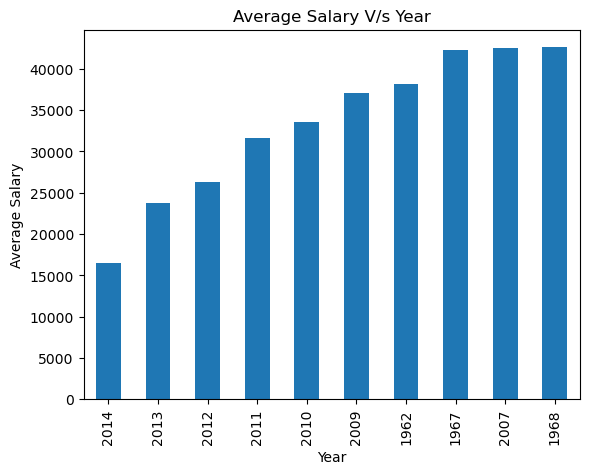

In [618]:
# plot the average salary v/s Year graph
df.groupby('hireyear')['annualsalary'].mean().sort_values().head(10).plot(kind='bar');

plt.xlabel('Year')
plt.ylabel('Average Salary')
plt.title('Average Salary V/s Year')
plt.show()

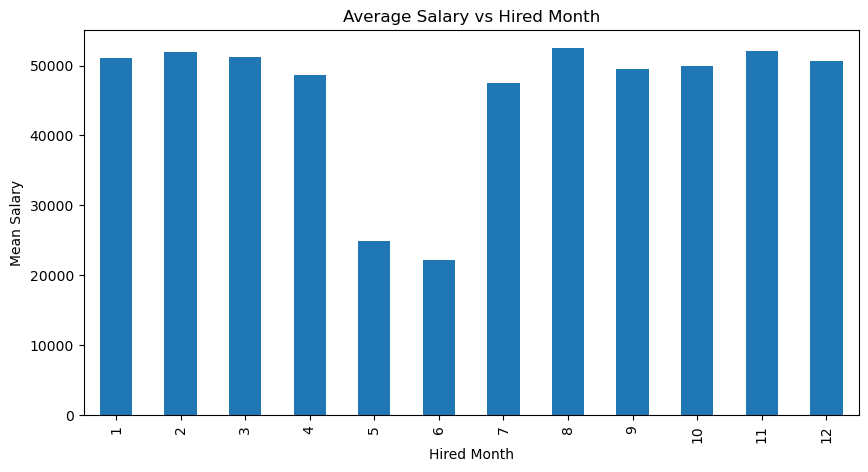

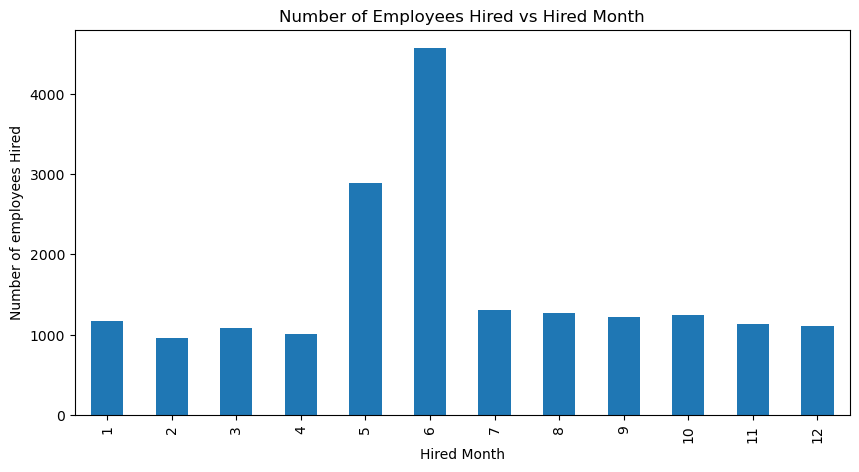

In [619]:
# Plot the grap to check on which month most of the people are hired.
plt.figure(figsize=(10,5))
df.groupby(['hiremonth'])['annualsalary'].mean().plot.bar()
plt.xlabel('Hired Month')
plt.ylabel('Mean Salary')
plt.title('Average Salary vs Hired Month')
plt.show()


# Big agencies may not have hired during months 5,6; so gives a lower salary. To check,
plt.figure(figsize=(10,5))
df.groupby(['hiremonth'])['name'].count().plot.bar()
plt.xlabel('Hired Month')
plt.ylabel('Number of employees Hired')
plt.title('Number of Employees Hired vs Hired Month')
plt.show()

# Recruits are done highest in months 5,6; but have lower mean salary. So, low paying jobs may hire more in months 5,6

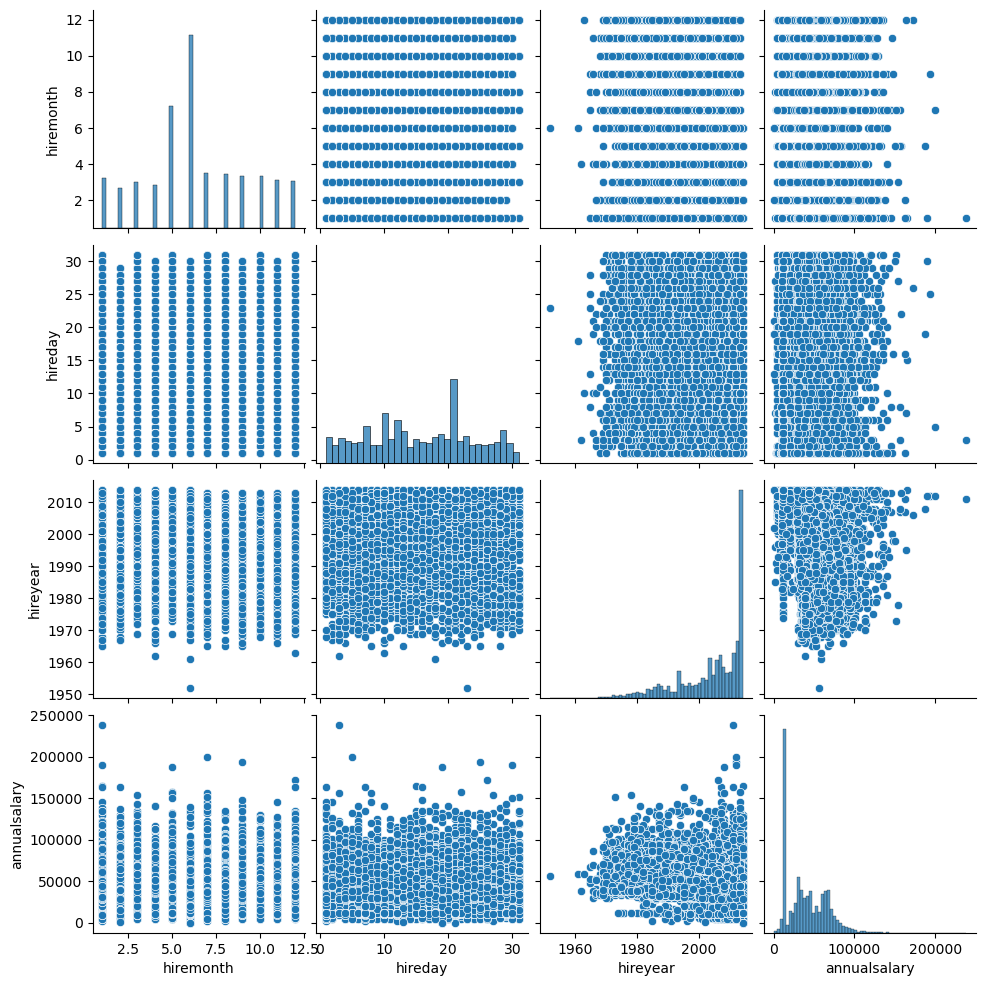

In [620]:
sns.pairplot(df);

<AxesSubplot:>

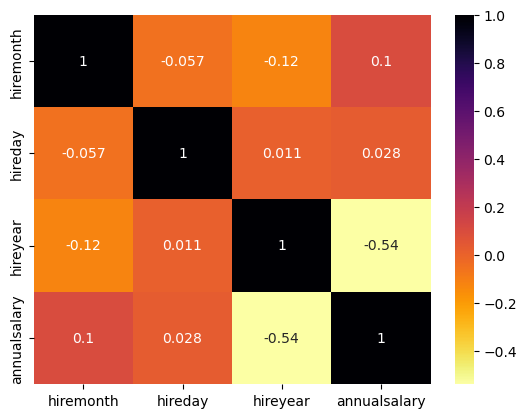

In [621]:
# plot a heatmap
sns.heatmap(df.corr(),annot=True, cmap = 'inferno_r')

## Machine Learning

In [622]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18981 entries, 0 to 18980
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          18981 non-null  object 
 1   jobtitle      18981 non-null  object 
 2   agencyid      18981 non-null  object 
 3   agency        18981 non-null  object 
 4   hiremonth     18981 non-null  int32  
 5   hireday       18981 non-null  int32  
 6   hireyear      18981 non-null  int32  
 7   annualsalary  18981 non-null  float64
dtypes: float64(1), int32(3), object(4)
memory usage: 964.0+ KB


In [623]:
df.head()

,name,jobtitle,agencyid,agency,hiremonth,hireday,hireyear,annualsalary
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,6,10,2013,11310.0
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10,24,1979,53428.0
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,9,25,2006,68300.0
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,7,23,2009,62000.0
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,7,24,2013,43999.0


In [624]:
X = df.drop(columns = ['name', 'jobtitle', 'agencyid', 'agency', 'annualsalary'], axis = 1)
y = df.iloc[:,-1].values

In [625]:
X

,hiremonth,hireday,hireyear
0,6,10,2013
1,10,24,1979
2,9,25,2006
3,7,23,2009
4,7,24,2013
...,...,...,...
18976,5,21,2014
18977,5,21,2014
18978,12,17,2013
18979,1,23,2013


### Data Preprocessing
- Feature Scalling

In [629]:
stan_scaler = StandardScaler()

In [631]:
X = stan_scaler.fit_transform(X)
y = stan_scaler.fit_transform(y.reshape(-1,1))

In [632]:
X.shape

(18981, 3)

In [633]:
y

array([[-1.13007919],
       [ 0.54310334],
       [ 1.13390942],
       ...,
       [ 0.16852624],
       [ 0.17269748],
       [ 0.54866499]])

* Train Test split

In [634]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [635]:
X_train.shape

(15184, 3)

In [636]:
X_test.shape

(3797, 3)

### Choose the model 

In [637]:
model = SVR()

### Train the Model

In [638]:
model.fit(X_train,y_train)

SVR()

### Test the model

In [639]:
y_pred = model.predict(X_test)

In [640]:
y_pred

array([0.64146179, 0.81726738, 1.0404624 , ..., 0.93889474, 1.00901178,
       0.31858833])

In [642]:
y_pred = stan_scaler.inverse_transform(y_pred.reshape(-1,1))

In [643]:
y_pred

array([[55903.91698252],
       [60329.36360847],
       [65947.71529635],
       ...,
       [63391.01470712],
       [65156.0280225 ],
       [47776.42096591]])

In [646]:
y_test = stan_scaler.inverse_transform(y_test)

In [647]:
y_test

array([[135000.],
       [ 79015.],
       [ 76393.],
       ...,
       [ 80965.],
       [ 24960.],
       [ 40994.]])

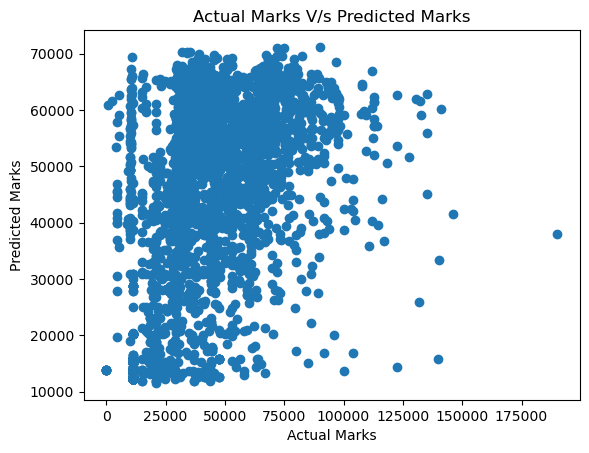

In [648]:
plt.scatter(y_test, y_pred);
plt.xlabel("Actual Marks")
plt.ylabel("Predicted Marks")
plt.title('Actual Marks V/s Predicted Marks');

### Performance Metrices

In [649]:
model.score(X_test, y_test)

-2.495155729427737

In [650]:
r2_score(y_test, y_pred)

0.4250248709515738

In [651]:
mean_squared_error(y_test, y_pred)

359068035.8967752

In [652]:
mean_absolute_error(y_test, y_pred)

13200.774979610973

### Conclusion

If an employee joins on the following date: 02/09/2018, 04/04/2015, 21/12/2021 we have to predict the salary
